In [3]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import pandas as pd

In [4]:
pstatic = pd.read_csv('3dpressureplot.dat')
pstatic

,nodenumber,x-coordinate,y-coordinate,z-coordinate,pressure
0,1,-0.004429,0.110982,0.015183,93019.15000
1,2,-0.003759,0.111280,0.016262,92907.38833
2,3,-0.004608,0.111351,0.016660,92555.96963
3,4,-0.005271,0.111043,0.015594,92669.05343
4,5,-0.003050,0.111618,0.017488,92730.69930
5,6,-0.003908,0.111678,0.017879,92389.49923
6,7,-0.002293,0.111981,0.018870,92471.20565
7,8,-0.003161,0.112050,0.019248,92130.59534
8,9,-0.001473,0.112398,0.020401,92141.72340
9,10,-0.002346,0.112472,0.020763,91797.35300


In [5]:
x = pstatic['    x-coordinate']
y = pstatic['    y-coordinate']
z = pstatic['    z-coordinate']
pressure = pstatic['        pressure']

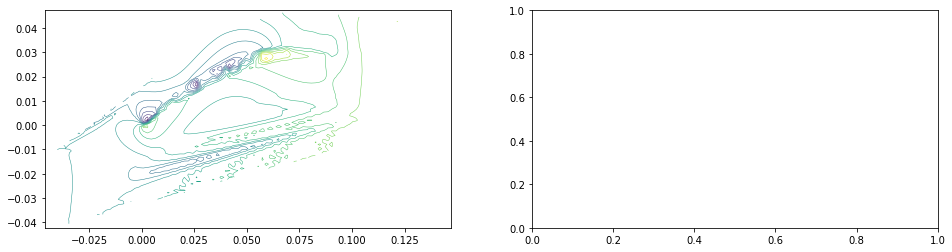

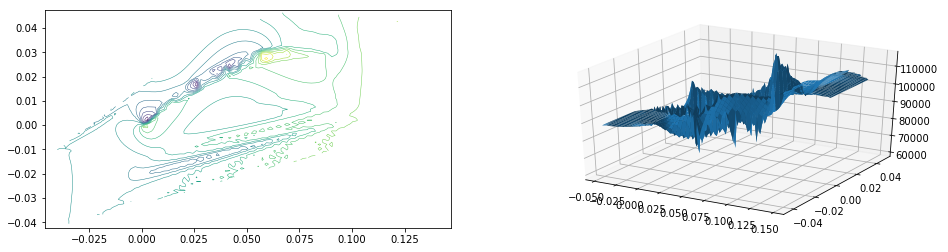

In [20]:
#fig = plt.figure(figsize=plt.figaspect(0.5))
fig = plt.figure(figsize=plt.figaspect(0.25))
ax = fig.add_subplot(1, 2, 1)
# note this: you can skip rows!
#my_data = np.genfromtxt('file1.csv', delimiter=',',skiprows=1)
X = z #my_data[:,0]
Y = x #my_data[:,1]
Z = pressure #my_data[:,2]

xi = np.linspace(X.min(),X.max(),100)
yi = np.linspace(Y.min(),Y.max(),100)
# VERY IMPORTANT, to tell matplotlib how is your data organized
zi = griddata((X, Y), Z, (xi[None,:], yi[:,None]), method='cubic')

CS = plt.contour(xi,yi,zi,15,linewidths=0.5,color='k')
ax = fig.add_subplot(1, 2, 2, projection='3d')

xig, yig = np.meshgrid(xi, yi)

surf = ax.plot_surface(xig, yig, zi,
        linewidth=0)

plt.show()